# Stationarity Analysis of a Telegraph Noise Measurement

Here we are analyzing a quantum point contact measurement. We will extract 
tunneling rate and check for stationarity.

In [1]:
import QuantumPolyspectra as qp
import matplotlib.pyplot as plt
import numpy as np

Actual T_window: 0.125
Maximum frequency: 5000.0
Number of points: 51


  0%|          | 0/494 [00:00<?, ?it/s]

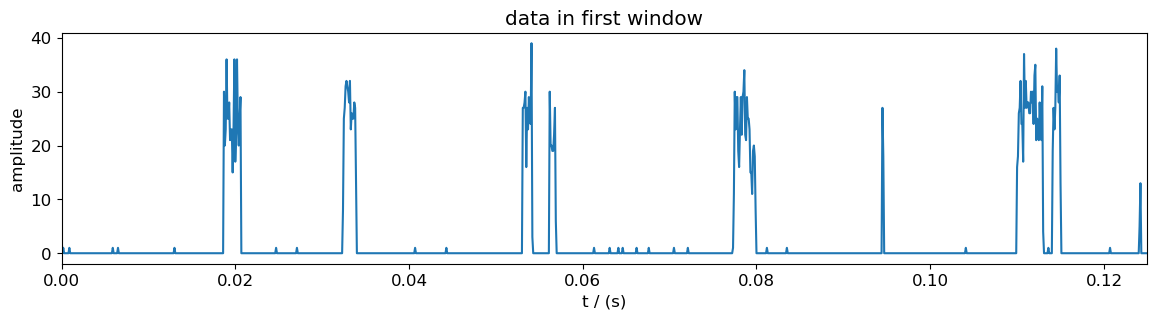

chunk shape:  1250


In [2]:
path = 'example_data/long_measurement.h5'
group_key = 'day1'
data_set = 'measurement1'
spec = qp.FitTelegraph(path, group_key, data_set)
f_max = 0.4e3
m = 10
T_window = 0.125

f, s, serr = spec.calc_spec(order_in=[2,3,4], backend='opencl', T_window=T_window, f_max=f_max, m=m, m_var=10, m_stationarity=80)

Let's see what the polyspectra look like.

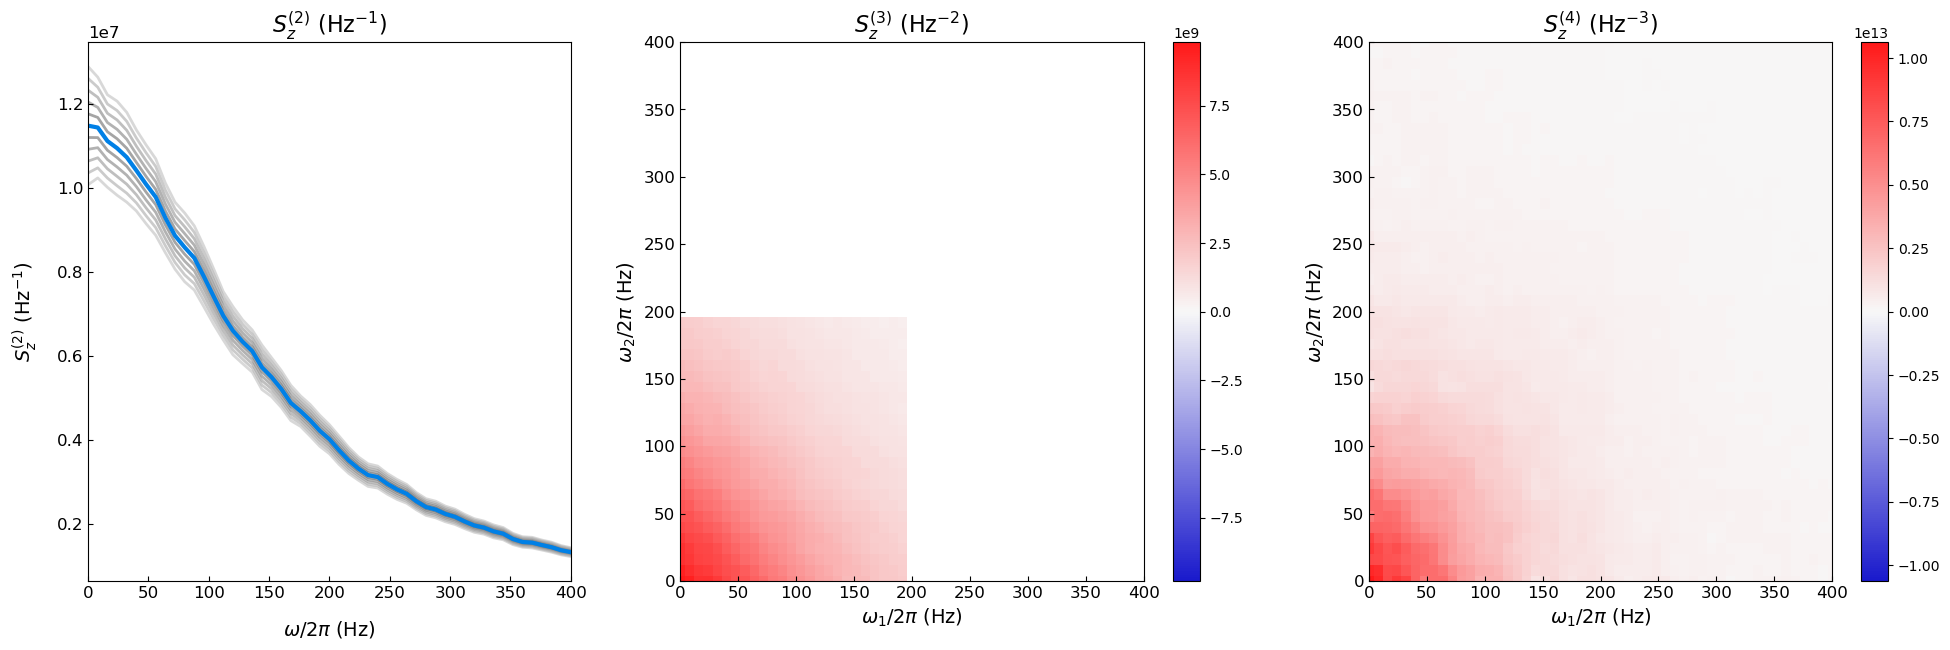

In [3]:
fig = spec.plot(arcsinh_plot=False, sigma=5, f_max=0.4e3, green_alpha=0.0, arcsinh_const=1e-4, contours=False)

Now we can fit the tunneling rates. We just have to specify initial
values for the tunneling parameters.

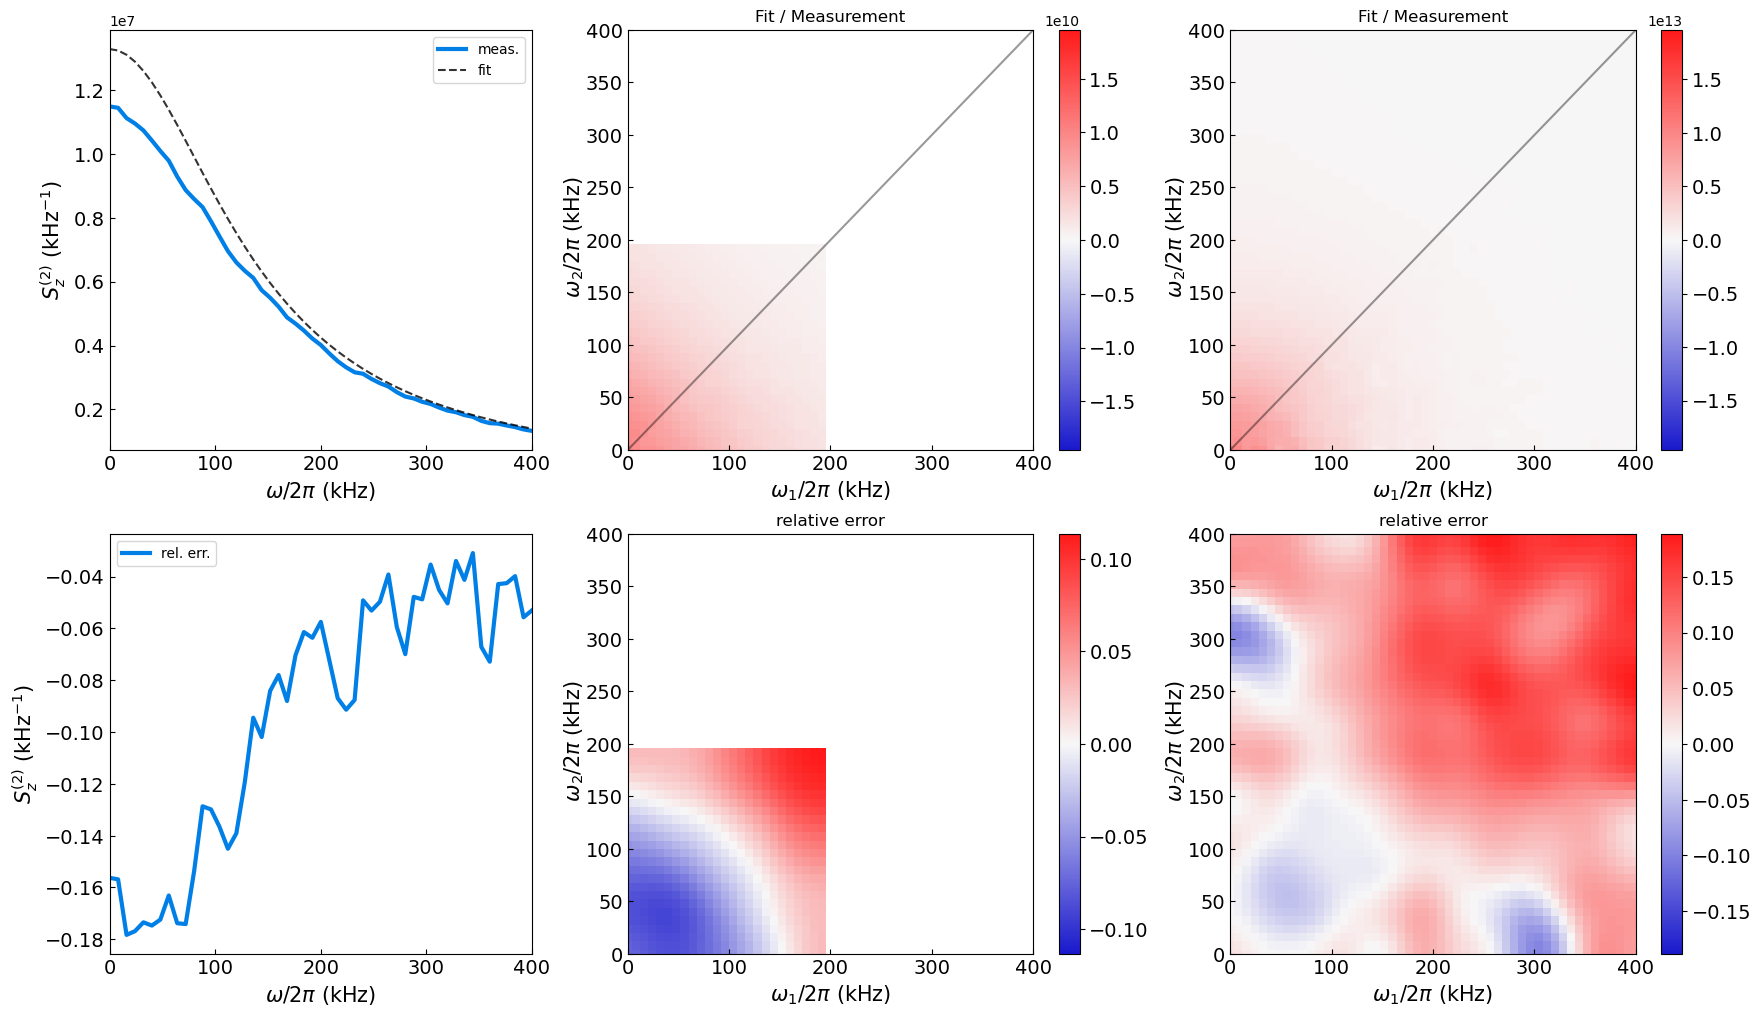

In [4]:
res = spec.fit_telegraph(gamma_in=10, gamma_out=700, beta=100)
res